In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor 
from sklearn import datasets
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/dataset_regression.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.isnull().sum().sum()

0

In [3]:
y = df["price_usd"]
X = df.drop(["price_usd"], axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [5]:
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [14]:
# print(f'MAE: {mean_absolute_error(y_test[0:10000], y_pred)}')
# print(f'MSE: {mean_squared_error(y_test[0:10000], y_pred)}')
# print(f'RMSE: {sqrt(mean_squared_error(y_test[0:10000], y_pred))}')
# print(f'MAPE: {mean_absolute_percentage_error(y_test[0:10000], y_pred)}')
print(f'R^2: {reg.score(X_test[0:10000], y_test[0:10000])}')

R^2: 0.6827424897055611


In [6]:
text_representation = tree.export_text(reg)
print(text_representation)

|--- feature_5 <= 2006.50
|   |--- feature_5 <= 2000.50
|   |   |--- feature_9 <= 2.35
|   |   |   |--- value: [1843.44]
|   |   |--- feature_9 >  2.35
|   |   |   |--- value: [3703.22]
|   |--- feature_5 >  2000.50
|   |   |--- feature_9 <= 2.45
|   |   |   |--- value: [4729.79]
|   |   |--- feature_9 >  2.45
|   |   |   |--- value: [7754.80]
|--- feature_5 >  2006.50
|   |--- feature_13 <= 0.50
|   |   |--- feature_5 <= 2013.50
|   |   |   |--- value: [15256.05]
|   |   |--- feature_5 >  2013.50
|   |   |   |--- value: [26281.50]
|   |--- feature_13 >  0.50
|   |   |--- feature_5 <= 2012.50
|   |   |   |--- value: [8371.19]
|   |   |--- feature_5 >  2012.50
|   |   |   |--- value: [13759.72]



In [7]:
# target_names = list(map(str, y.unique()))
features = list(df.columns)[:-1]

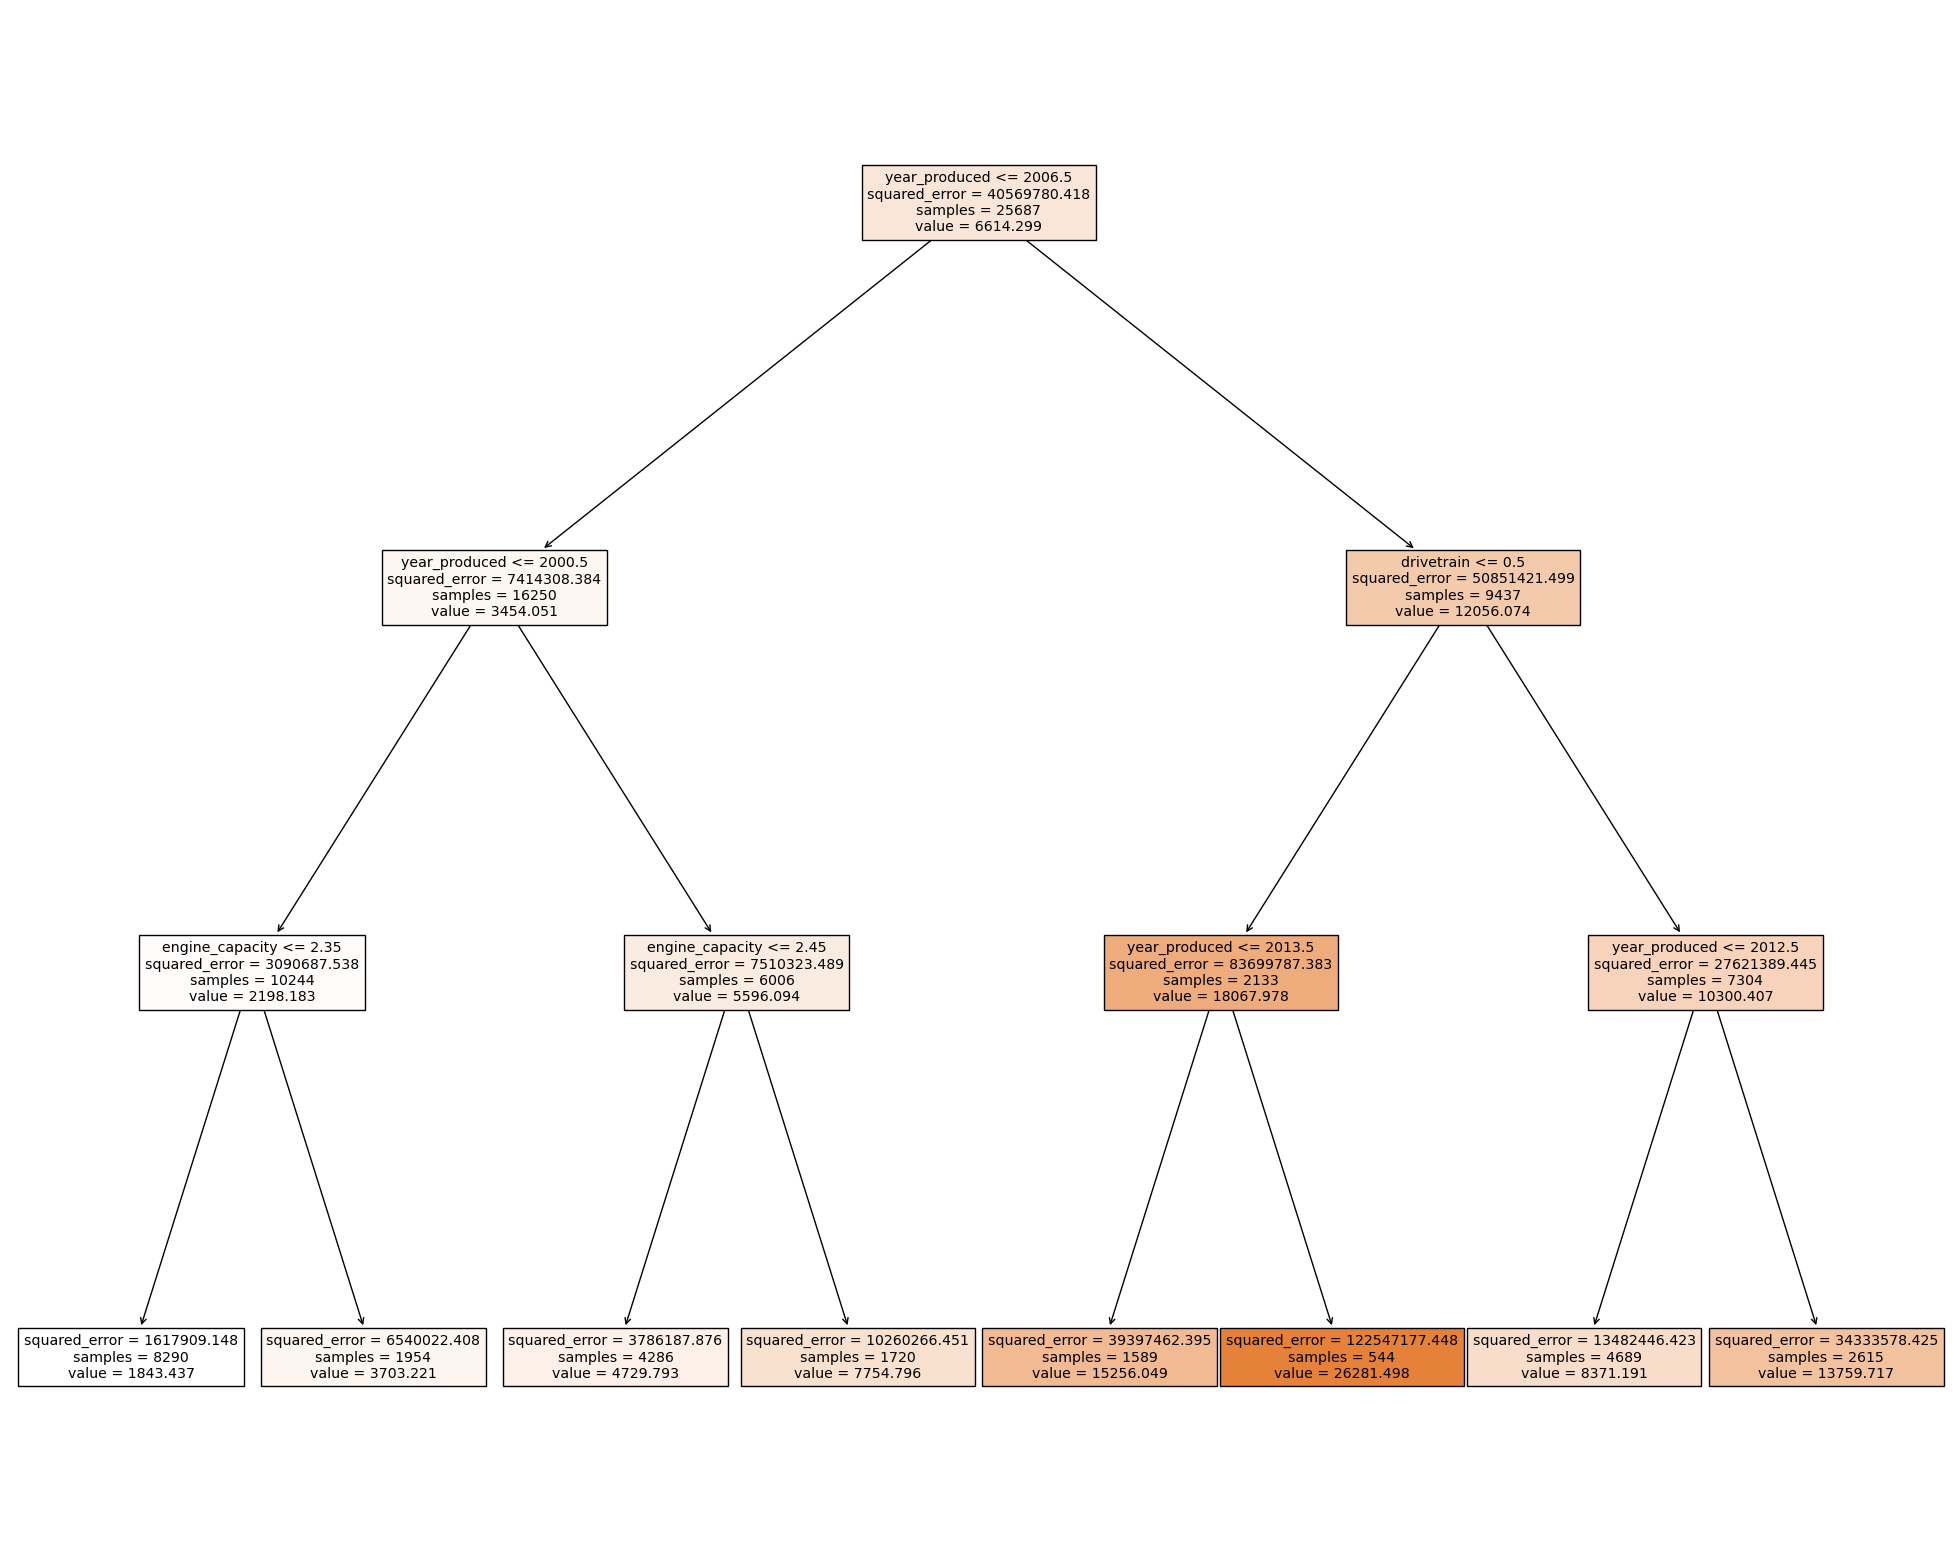

In [8]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, feature_names=features, filled=True)

In [9]:
regr = GridSearchCV(DecisionTreeRegressor(),
                                            {
                                            'criterion': ["squared_error", "friedman_mse", "absolute_error"],
                                            'max_depth': np.array(range(1, 2*X_train.shape[1]+1)),
                                            },
                                            cv=2,
                                            n_jobs=3,
                                            ).fit(X_train[0:10000], y_train[0:10000])

In [10]:
regr.best_params_

{'criterion': 'squared_error', 'max_depth': 6}

In [11]:
X_test.shape

(12844, 29)

In [12]:
y_pred = regr.predict(X_test[0:10000])

In [13]:
print(f'MAE: {mean_absolute_error(y_test[0:10000], y_pred)}')
print(f'MSE: {mean_squared_error(y_test[0:10000], y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test[0:10000], y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test[0:10000], y_pred)}')
print(f'R^2: {regr.score(X_test[0:10000], y_test[0:10000])}')

MAE: 1708.348443467512
MSE: 8211527.131167852
RMSE: 2865.576230214065
MAPE: 0.6481637447587254
R^2: 0.8094747925400334
